In [1]:
import cv2
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
def beautify_response(resp):
    for text in resp.text_annotations:        
        print('\n"{}"'.format(text.description))        
        vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])        
        print('bounds: {}'.format(','.join(vertices)))

def load_img_resp(path, file_name):
    img_file = os.path.join(path, 'images', file_name)
    resp_file = os.path.join(path,'resp', f'{os.path.splitext(file_name)[0]}_resp.pkl')
    resp = pickle.load(open(resp_file, 'rb'))
    img = cv2.imread(img_file)
    return img, resp

def show_img(img, size):
    plt.figure(figsize=(size,size))
    plt.axis('off')
    plt.imshow(img[...,::-1])

def display_bb(img, resp, feature):
    document = resp.full_text_annotation
    bounds = []
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if feature == 's':
                            bounds.append(symbol.bounding_box)
                    if feature == 'w':
                        bounds.append(word.bounding_box)
                if feature == 'p':
                    bounds.append(paragraph.bounding_box)
            if feature == 'b':
                bounds.append(block.bounding_box)

    for bound in bounds:
        cv2.rectangle(img, (bound.vertices[0].x, bound.vertices[0].y), (bound.vertices[2].x, bound.vertices[2].y), (55,50,250), 1)
  
    show_img(img, 7)

In [3]:
data_path = 'data'
img, resp = load_img_resp(data_path, 'image_0.jpg')

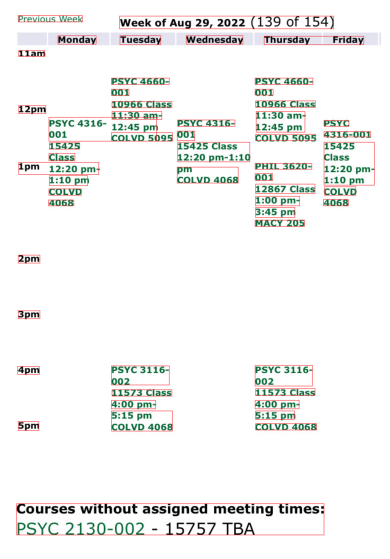

In [4]:
display_bb(img, resp, 'w')

In [30]:
beautify_response(resp)


"Previous Week
11am
12pm
2pm
15425
Class
1pm 12:20 pm-
1:10 pm
3pm
4pm
Monday
5pm
Week of Aug 29, 2022 (139 of 154)
Tuesday
Wednesday
10966 Class
11:30 am-
PSYC 4316- 12:45 pm
001
COLVD
4068
PSYC 4660-
001
COLVD 5095
PSYC 3116-
002
11573 Class
4:00 pm-
5:15 pm
COLVD 4068
PSYC 4316-
001
15425 Class
12:20 pm-1:10
pm
COLVD 4068
Thursday Friday
PSYC 4660-
001
10966 Class
11:30 am-
12:45 pm
COLVD 5095
PHIL 3620-
001
12867 Class
1:00 pm-
3:45 pm
MACY 205
PSYC 3116-
002
11573 Class
4:00 pm-
5:15 pm
COLVD 4068
PSYC
4316-001
15425
Class
12:20 pm-
1:10 pm
COLVD
4068
Courses without assigned meeting times:
PSYC 2130-002- 15757 TBA"
bounds: (12,10),(690,10),(690,990),(12,990)

"Previous"
bounds: (15,10),(85,10),(85,22),(15,22)

"Week"
bounds: (92,10),(136,10),(136,22),(92,22)

"11am"
bounds: (16,76),(65,76),(65,87),(16,87)

"12pm"
bounds: (16,180),(67,180),(67,195),(16,195)

"2pm"
bounds: (15,462),(56,462),(56,477),(15,477)

"15425"
bounds: (74,250),(131,250),(131,262),(74,262)

"Class"
bounds: (